# Heart attack prediction using classical machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Data cleaning and importing

In [2]:
df = pd.read_csv('data/heart_attack_prediction_indonesia.csv')

df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [3]:
numeric_features = ['age', 'cholesterol_level', 'waist_circumference', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides']
categorical_features = ['gender','hypertension', 'diabetes', 'obesity', 'family_history',  'region', 'income_level', 'smoking_status', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening']

In [4]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

# Display the first few rows
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (158355, 28)

Data Types:
age                                 int64
gender                             object
region                             object
income_level                       object
hypertension                        int64
diabetes                            int64
cholesterol_level                   int64
obesity                             int64
waist_circumference                 int64
family_history                      int64
smoking_status                     object
alcohol_consumption                object
physical_activity                  object
dietary_habits                     object
air_pollution_exposure             object
stress_level                       object
sleep_hours                       float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
fasting_blood_sugar                 int64
cholesterol_hdl                     int64
cholesterol_ldl                     int64
triglycerides                      

In [5]:
# Convert numerical columns to appropriate types
numerical_cols = ['age', 'cholesterol_level', 'waist_circumference', 'sleep_hours', 
                 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar',
                 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides']

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert binary columns to integers
binary_cols = ['hypertension', 'diabetes', 'obesity', 'family_history', 
              'previous_heart_disease', 'medication_usage', 
              'participated_in_free_screening', 'heart_attack']

for col in binary_cols:
    df[col] = df[col].astype(int)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease 

In [6]:
from sklearn.impute import SimpleImputer
# Strategy 1: Impute with the most frequent value (mode)
alcohol_imputer = SimpleImputer(strategy='most_frequent')
df['alcohol_consumption'] = alcohol_imputer.fit_transform(df[['alcohol_consumption']]).ravel()

# Alternative Strategy 2: Create a new category for missing values
# df['alcohol_consumption'] = df['alcohol_consumption'].fillna('Unknown')

print("\nUnique values in alcohol_consumption after imputation:")
print(df['alcohol_consumption'].value_counts())

# Check for any remaining missing values
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Unique values in alcohol_consumption after imputation:
alcohol_consumption
Moderate    142573
High         15782
Name: count, dtype: int64

Missing Values After Imputation:
age                               0
gender                            0
region                            0
income_level                      0
hypertension                      0
diabetes                          0
cholesterol_level                 0
obesity                           0
waist_circumference               0
family_history                    0
smoking_status                    0
alcohol_consumption               0
physical_activity                 0
dietary_habits                    0
air_pollution_exposure            0
stress_level                      0
sleep_hours                       0
blood_pressure_systolic           0
blood_pressure_diastolic          0
fasting_blood_sugar               0
cholesterol_hdl                   0
cholesterol_ldl                   0
triglycerides                     

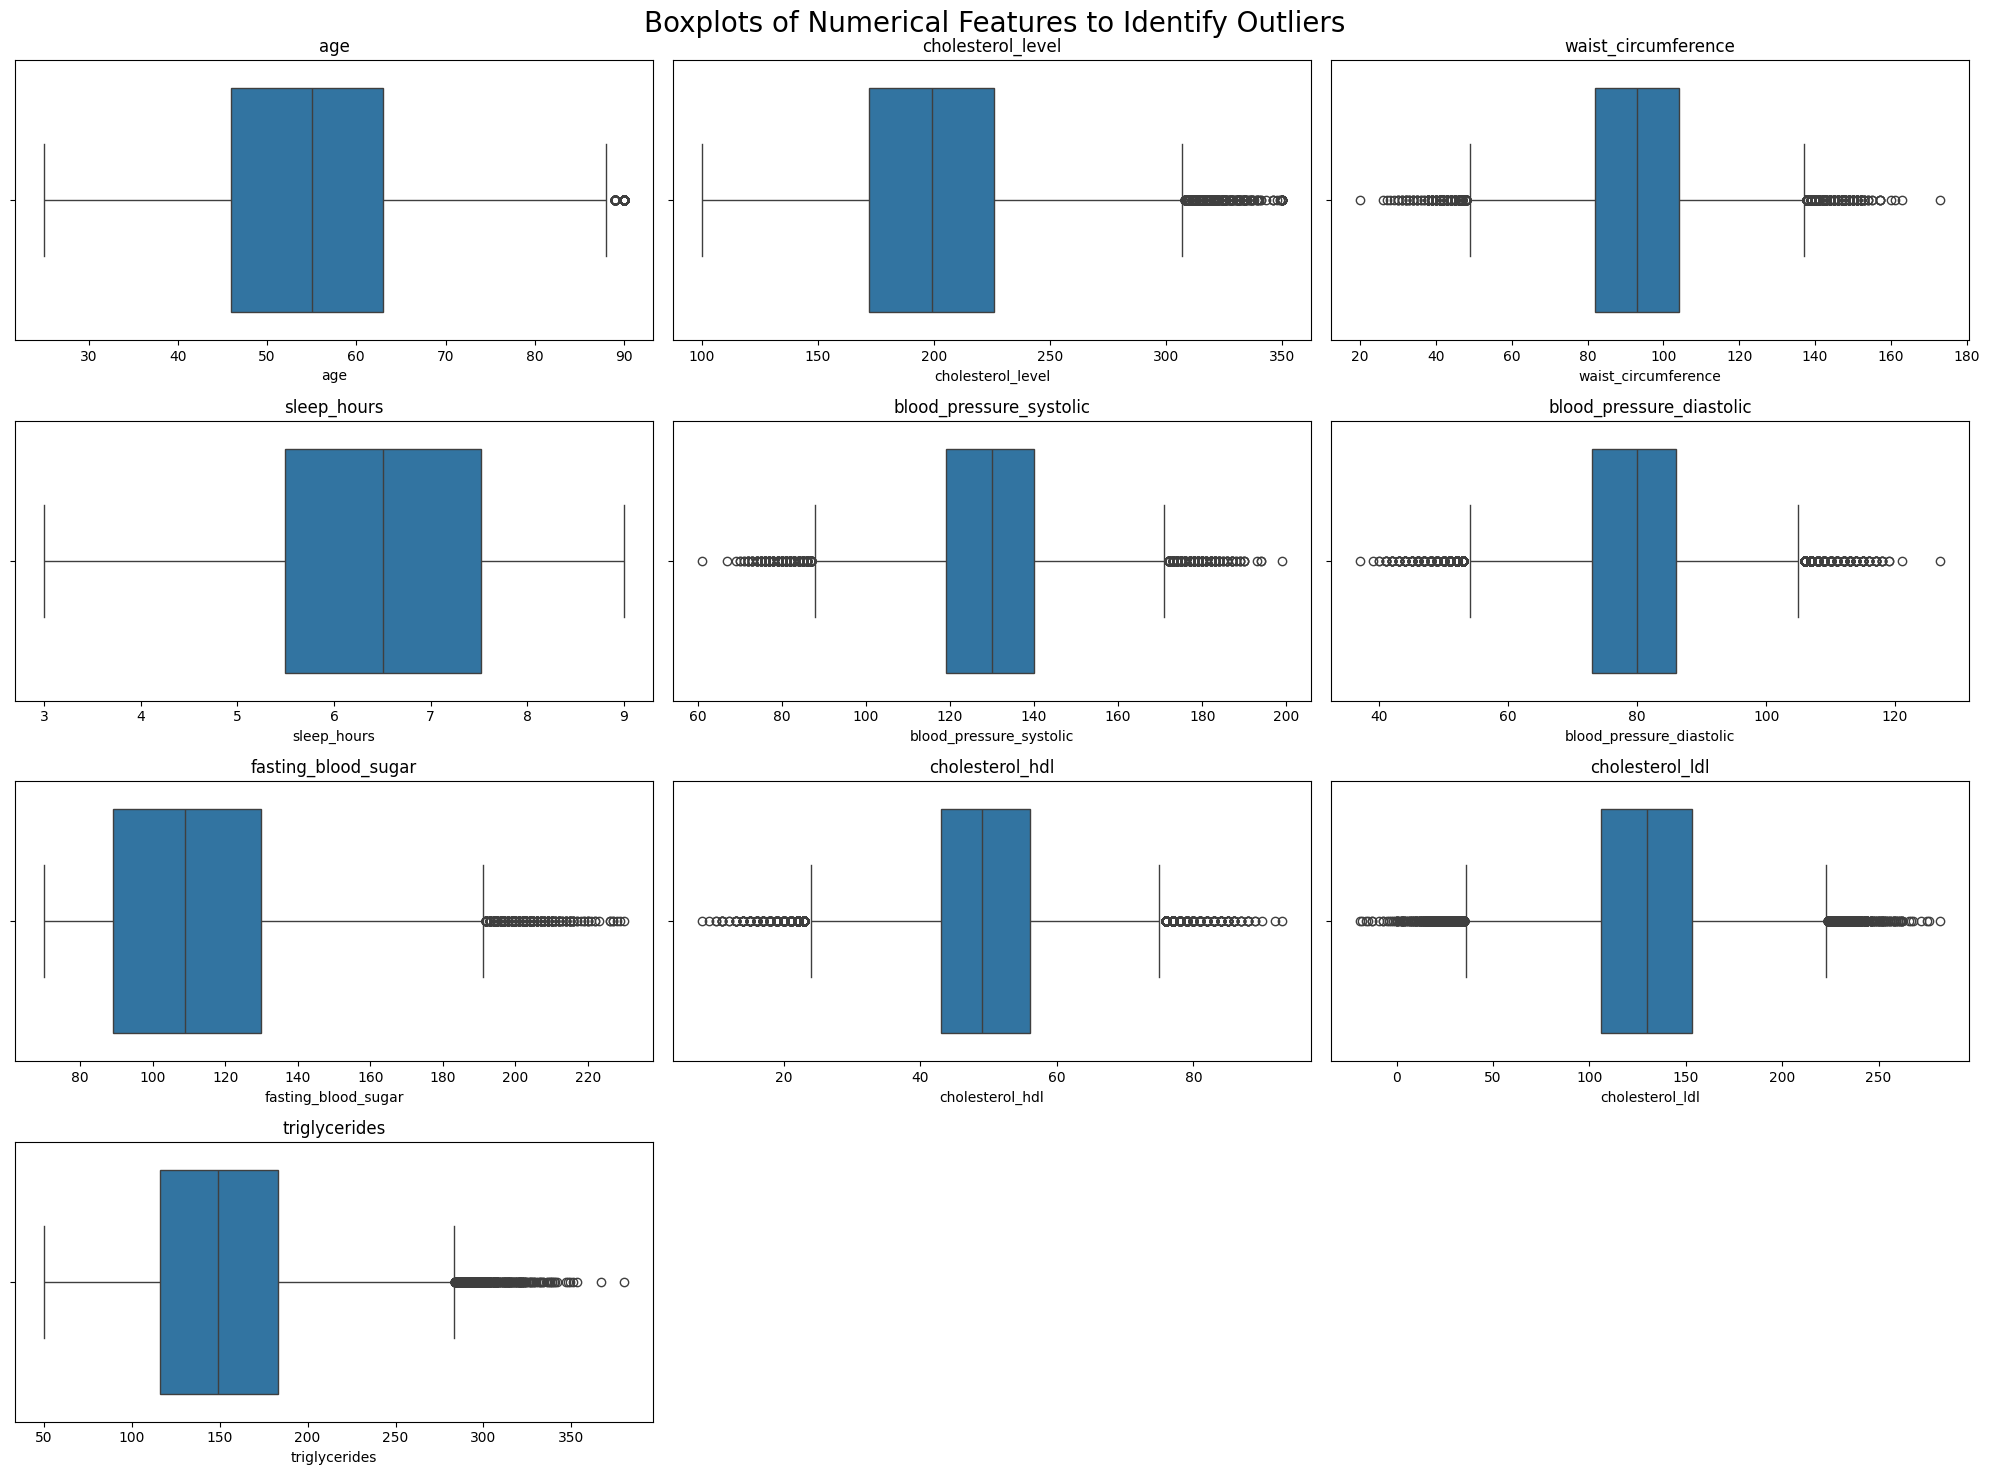

In [7]:
numerical_cols = [
    'age', 'cholesterol_level', 'waist_circumference', 'sleep_hours', 
    'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar',
    'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]

# Set up the plot
plt.figure(figsize=(20, 15))
plt.suptitle('Boxplots of Numerical Features to Identify Outliers', fontsize=20)

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [8]:
def handle_outliers_capping(dataframe, columns):
    df_capped = dataframe.copy()
    for col in columns:
        lower_bound = df_capped[col].quantile(0.01)
        upper_bound = df_capped[col].quantile(0.99)
        df_capped[col] = np.clip(df_capped[col], lower_bound, upper_bound)
    return df_capped

# Apply the capping function
df_processed = handle_outliers_capping(df, numerical_cols)

Visualizing distributions AFTER handling outliers...


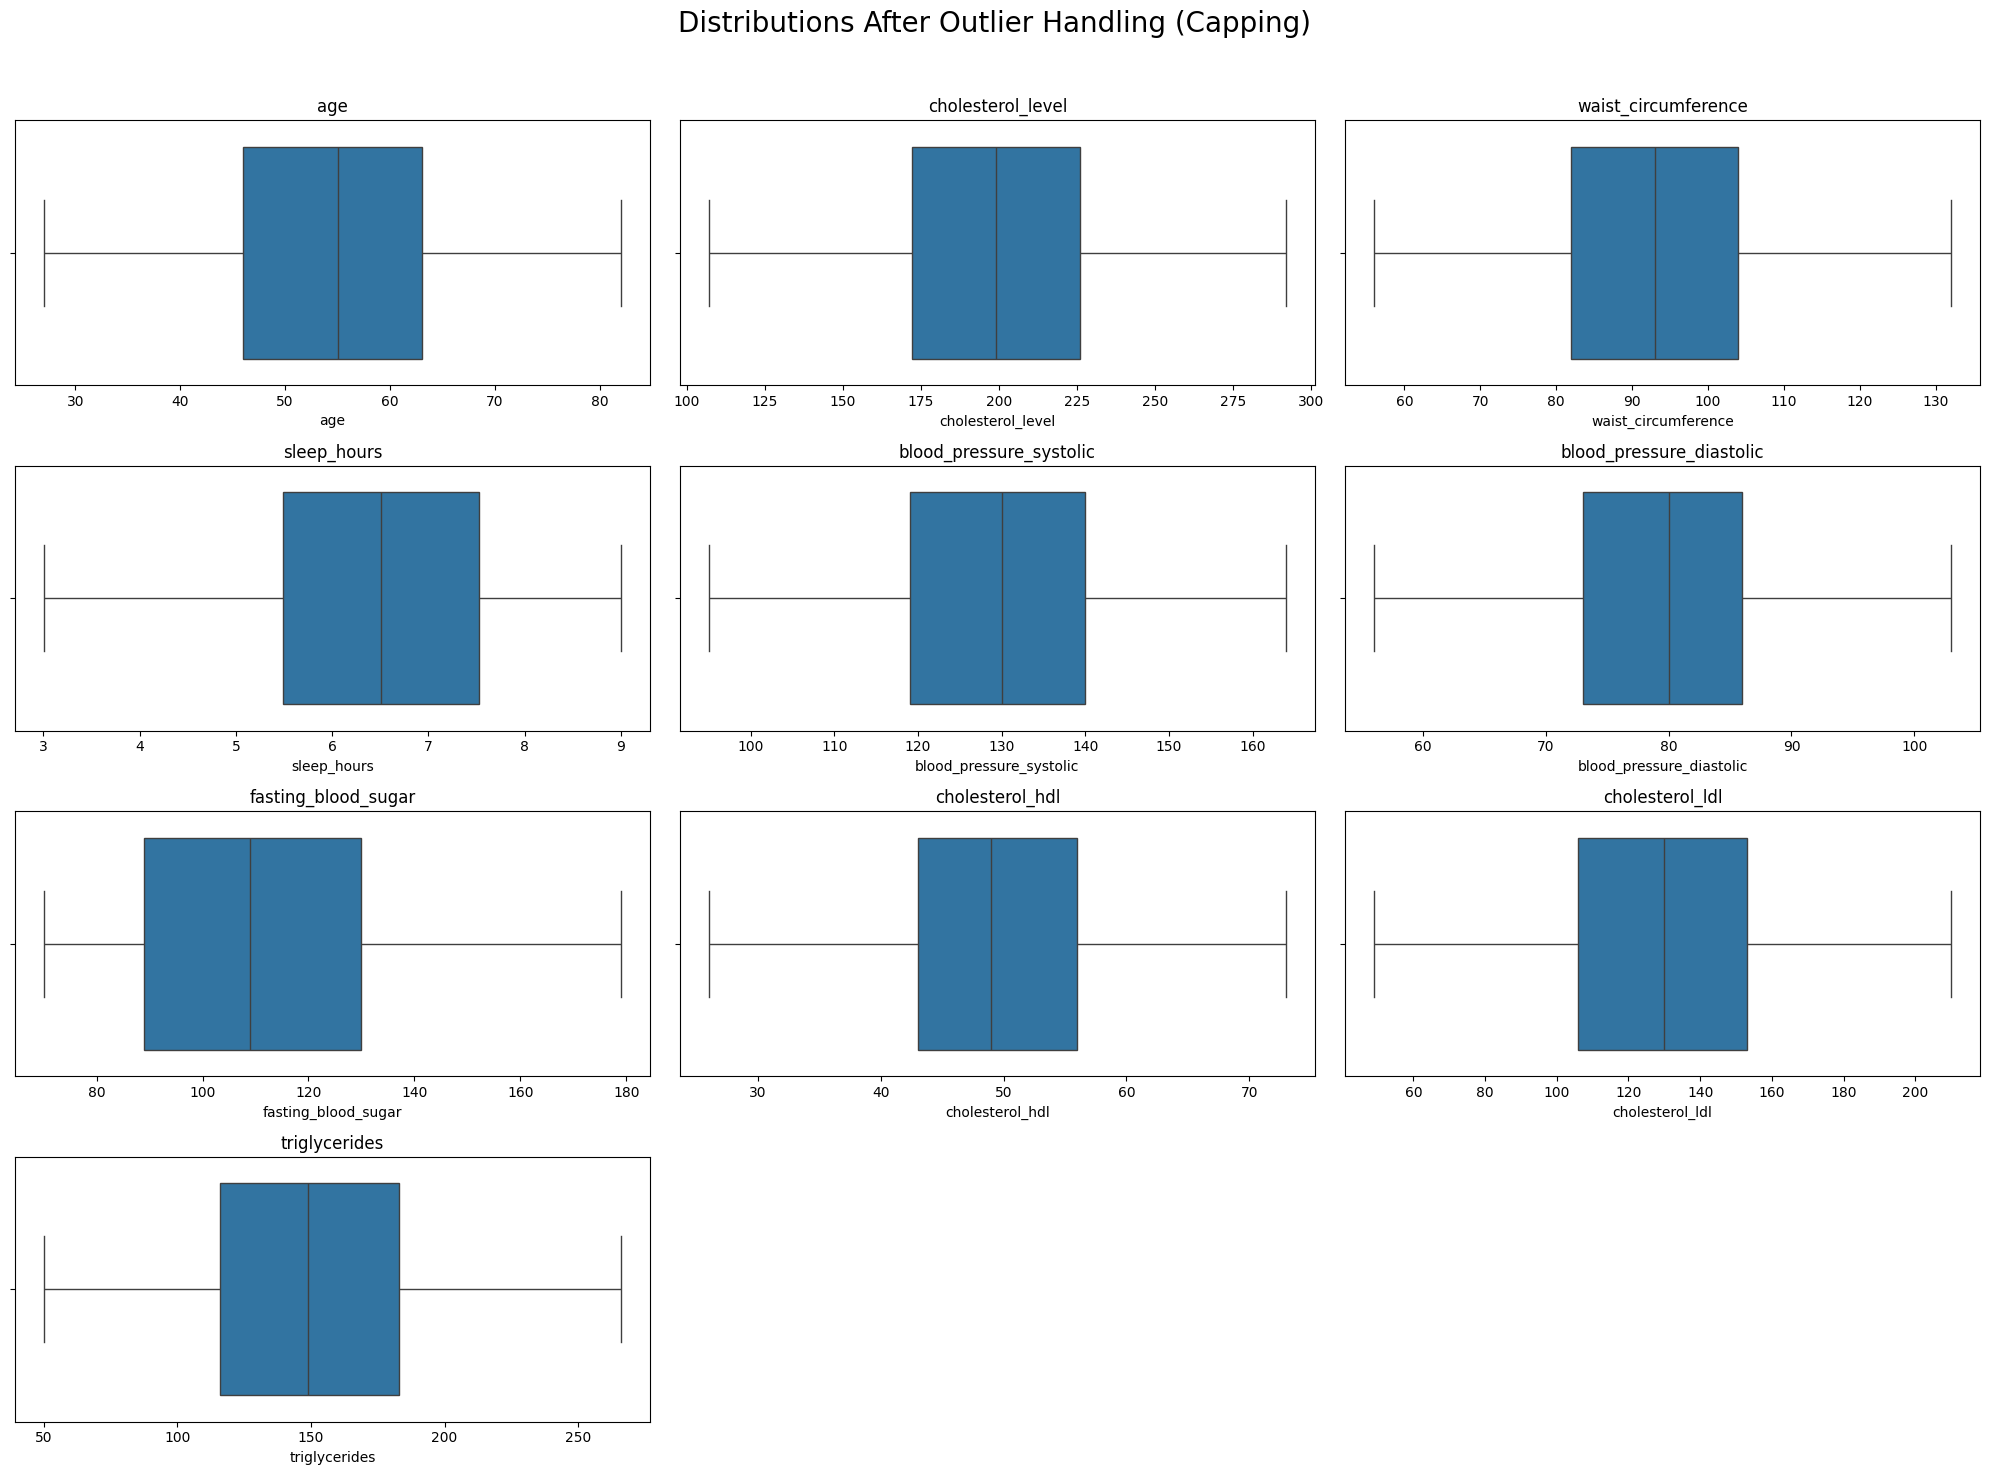

In [9]:
# Visualize distributions AFTER handling outliers
print("Visualizing distributions AFTER handling outliers...")
plt.figure(figsize=(20, 15))
plt.suptitle('Distributions After Outlier Handling (Capping)', fontsize=20)
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df_processed[col])
    plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Preprocessing for model training

### Apply preprocessing pipeline to data

In [10]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler , OneHotEncoder

In [11]:
df['heart_attack'].value_counts()

heart_attack
0    94854
1    63501
Name: count, dtype: int64

In [12]:
df.columns

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'alcohol_consumption', 'physical_activity',
       'dietary_habits', 'air_pollution_exposure', 'stress_level',
       'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')

In [13]:
# --- 2. DEFINE FEATURES (X) AND TARGET (y) ---
X = df.drop('heart_attack', axis=1)
y = df['heart_attack']

In [14]:
numeric_features = [
    'age', 'cholesterol_level', 'waist_circumference', 'sleep_hours', 
    'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar',
    'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]

# Features that need one-hot encoding
categorical_features = [
    'gender', 'region', 'income_level', 'smoking_status', 
    'alcohol_consumption', 'physical_activity', 'dietary_habits',
    'air_pollution_exposure', 'stress_level', 'EKG_results'
]

# Binary features that should be passed through unchanged
binary_features = [
    'hypertension', 'diabetes', 'obesity', 'family_history', 
    'previous_heart_disease', 'medication_usage', 
    'participated_in_free_screening'
]

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# --- 5. CREATE PREPROCESSING PIPELINES ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', binary_transformer, binary_features)
    ]
)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [19]:
from sklearn.model_selection import train_test_split
# --- 3. SPLIT THE DATASET INTO TRAINING AND TEST SETS ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Fit on the training data and transform it
X_train_transformed = preprocessor.fit_transform(X_train)

# Only transform the test data
X_test_transformed = preprocessor.transform(X_test)

In [21]:
print("\nPreprocessing complete.")
print(f"Shape of transformed training data: {X_train_transformed.shape}")
print(f"Shape of transformed test data: {X_test_transformed.shape}")


Preprocessing complete.
Shape of transformed training data: (126684, 42)
Shape of transformed test data: (31671, 42)


In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [23]:
print("SMOTE application complete.")
print(f"Resampled training set shape: {X_train_resampled.shape}")
print("\nResampled training set target distribution:")
print(y_train_resampled.value_counts(normalize=True))

SMOTE application complete.
Resampled training set shape: (151766, 42)

Resampled training set target distribution:
heart_attack
0    0.5
1    0.5
Name: proportion, dtype: float64


## Models training

In [26]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

def evaluate_model(model, X_train, y_train, X_test, y_test, threshold=0.5):
    """
    Trains a model on the given training data and evaluates it on the test data.
    Returns a dictionary of key metrics with clean, lowercase keys.
    """
    # 1. Train the model on the correct training data variable
    print("Training model...")
    model.fit(X_train, y_train) # <<< FIX: Changed 'x' to 'X_train'
    
    # 2. Make predictions on the test data
    print("Making predictions...")
    # Get probability scores for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_proba >= threshold).astype(int)
    
    # 3. Calculate various metrics
    roc_auc = roc_auc_score(y_test, y_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # 4. Return all metrics in a single dictionary
    metrics = {
        "roc_auc": roc_auc,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": cm,
        "classification_report": report
    }
    
    print("Evaluation complete.")
    return metrics

# --- How to Use the Corrected Function ---

# Assume you have your preprocessed data ready:
# X_train_resampled, y_train_resampled (from SMOTE)
# X_test_transformed, y_test (from ColumnTransformer)

from sklearn.ensemble import HistGradientBoostingClassifier

# 1. Initialize your model
model = HistGradientBoostingClassifier(random_state=42)

# 2. Evaluate the model using the corrected function
print("--- Evaluating Model ---")
metrics = evaluate_model(
    model, 
    X_train_resampled, 
    y_train_resampled, 
    X_test_transformed, 
    y_test
)

# 3. Print the results in a readable format
print("\n--- Overall Metrics ---")
print(f"ROC AUC Score: {metrics['roc_auc']:.4f}")
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"F1-Score: {metrics['f1_score']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")

print("\n--- Confusion Matrix ---")
cm = metrics['confusion_matrix']
print("Predicted 0   Predicted 1")
print(f"Actual 0    {cm[0]}")
print(f"Actual 1    {cm[1]}")

print("\n--- Detailed Classification Report ---")
# The classification report is already a dictionary, so we can print it directly
# To make it more readable, we can convert it to a DataFrame
report_df = pd.DataFrame(metrics['classification_report']).transpose()
print(report_df)

--- Evaluating Model ---
Training model...
Making predictions...
Evaluation complete.

--- Overall Metrics ---
ROC AUC Score: 0.8135
Accuracy: 0.7349
F1-Score: 0.6580
Precision: 0.6817
Recall: 0.6359

--- Confusion Matrix ---
Predicted 0   Predicted 1
Actual 0    [15200  3771]
Actual 1    [4624 8076]

--- Detailed Classification Report ---
              precision    recall  f1-score       support
0              0.766747  0.801223  0.783606  18971.000000
1              0.681692  0.635906  0.658003  12700.000000
accuracy       0.734931  0.734931  0.734931      0.734931
macro avg      0.724219  0.718564  0.720805  31671.000000
weighted avg   0.732640  0.734931  0.733240  31671.000000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1),
    "Gradient Boosting": HistGradientBoostingClassifier(random_state=42)
}

# --- 4. Set up Cross-Validation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# --- 5. Train and Evaluate Each Model ---
print("=== Comparing Models on Balanced Training Set ===")
for name, model in models.items():
    # Use cross-validation to get a robust performance estimate
    # We use the balanced, resampled training data
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring='roc_auc', n_jobs=-1)
    
    # Store the results
    results.append({
        "Model": name,
        "Mean ROC-AUC": np.mean(scores),
        "Std ROC-AUC": np.std(scores),
        "Min ROC-AUC": np.min(scores),
        "Max ROC-AUC": np.max(scores)
    })

# --- 6. Display the Results ---
results_df = pd.DataFrame(results)
print("\n--- Cross-Validation ROC-AUC Scores ---")
# Sort by the mean score for better comparison
results_df = results_df.sort_values(by="Mean ROC-AUC", ascending=False)
display(results_df)

=== Comparing Models on Balanced Training Set ===

--- Cross-Validation ROC-AUC Scores ---


,Model,Mean ROC-AUC,Std ROC-AUC,Min ROC-AUC,Max ROC-AUC
2,Gradient Boosting,0.873522,0.001979,0.870831,0.875889
1,Random Forest,0.871684,0.002238,0.868596,0.874155
0,Logistic Regression,0.807200,0.002484,0.803281,0.811017


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train_resampled, y_train_resampled, train_size=0.2, stratify=y_train_resampled, random_state=42
)

# --- 3. DEFINE RANDOM FOREST AND PARAMETER DISTRIBUTIONS ---
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

# --- 4. SET UP CROSS-VALIDATION AND SCORING ---
# FIX: Remove the invalid 'needs_proba=True' argument from make_scorer
f1_scorer = make_scorer(f1_score, pos_label=1)

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# --- 5. RUN RANDOMIZED SEARCH ---
# NOTE: The class is `RandomizedSearchCV` (not `RandomizedSearchCV`)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring=f1_scorer, # Use the corrected scorer
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the search on the small sample of data
random_search.fit(X_train_sample, y_train_sample)

# Get the best model found by the search
best_model = random_search.best_estimator_

# --- 6. DISPLAY THE RESULTS ---
print("=== RandomizedSearchCV Results ===")
print("Best Parameters Found:")
print(random_search.best_params_)
# This will now show a valid F1-score instead of nan
print(f"\nBest F1-Score (on validation folds): {random_search.best_score_:.4f}")

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import make_scorer, f1_score, precision_recall_curve, confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

# --- 1. ASSUME PREPROCESSING IS DONE ---
# Assume you have X_train_resampled, y_train_resampled, X_test_transformed, y_test

# --- 2. DEFINE FINAL MODEL ---
# Use the best parameters found by RandomizedSearchCV
final_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    max_depth=25,
    random_state=42
)

# --- 3. TRAIN FINAL MODEL ---
print("Training final model on the full balanced training set...")
final_model.fit(X_train_resampled, y_train_resampled)

# --- 4. MAKE PREDICTIONS ---
print("Making predictions on the test set...")
y_proba = final_model.predict_proba(X_test_transformed)[:, 1]

# --- 5. FIND OPTIMAL THRESHOLD ---
def find_best_threshold(y_true, y_proba):
    """Finds the threshold that maximizes the F1-score."""
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    ix = np.argmax(f1_scores)
    return thresholds[ix], f1_scores[ix]

best_threshold, best_f1 = find_best_threshold(y_test, y_proba)
print(f"\nOptimal Threshold for F1-Score: {best_threshold:.4f}")
print(f"Optimal F1-Score on Test Set: {best_f1:.4f}")

# --- 6. EVALUATE WITH OPTIMAL THRESHOLD ---
y_pred_optimal = (y_proba >= best_threshold).astype(int)

# --- 7. DISPLAY FINAL RESULTS ---
# Calculate metrics using the optimal predictions
final_roc_auc = roc_auc_score(y_test, y_proba)
final_accuracy = accuracy_score(y_test, y_pred_optimal)
final_precision = precision_score(y_test, y_pred_optimal)
final_recall = recall_score(y_test, y_pred_optimal)
final_f1 = f1_score(y_test, y_pred_optimal)
final_cm = confusion_matrix(y_test, y_pred_optimal)

print("\n=== Final Evaluation on Test Set (with Optimal Threshold) ===")
metrics_df = pd.DataFrame({
    "Metric": ["ROC-AUC", "Accuracy", "Precision", "Recall", "F1-score"],
    "Score": [final_roc_auc, final_accuracy, final_precision, final_recall, final_f1]
})
display(metrics_df)

print("\nConfusion Matrix:")
cm_df = pd.DataFrame(final_cm,
                  index=["Actual 0", "Actual 1"],
                  columns=["Predicted 0", "Predicted 1"])
display(cm_df)

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_optimal))

Training final model on the full balanced training set...
Making predictions on the test set...

Optimal Threshold for F1-Score: 0.3485
Optimal F1-Score on Test Set: 0.6846

=== Final Evaluation on Test Set (with Optimal Threshold) ===


,Metric,Score
0,ROC-AUC,0.810503
1,Accuracy,0.684822
2,Precision,0.571707
3,Recall,0.853150
4,F1-score,0.684633



Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,10854,8117
Actual 1,1865,10835



Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.57      0.69     18971
           1       0.57      0.85      0.68     12700

    accuracy                           0.68     31671
   macro avg       0.71      0.71      0.68     31671
weighted avg       0.74      0.68      0.68     31671



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report
)

# --- Train final model on balanced dataset ---
final_model = RandomForestClassifier(
    n_estimators=200,        # Best tuned value
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

# Train using resampled (SMOTE) data
final_model.fit(X_train_resampled, y_train_resampled)

# IMPORTANT: always use X_test_transformed, not X_test
y_proba = final_model.predict_proba(X_test_transformed)[:, 1]

# Apply best threshold
y_pred = (y_proba >= best_threshold).astype(int)

# --- Evaluation ---
metrics_df = pd.DataFrame({
    "Metric": ["ROC-AUC", "Accuracy", "Precision (class 1)", "Recall (class 1)", "F1-score (class 1)"],
    "Score": [
        roc_auc_score(y_test, y_proba),      # AUC uses probabilities
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

print(f"=== Evaluation on Test Set (Threshold = {best_threshold}) ===")
display(metrics_df)

# --- Confusion Matrix ---
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

print("\nConfusion Matrix:")
display(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Evaluation on Test Set (Threshold = 0.4000000000000002) ===


,Metric,Score
0,ROC-AUC,0.811166
1,Accuracy,0.709892
2,Precision (class 1),0.606839
3,Recall (class 1),0.785354
4,F1-score (class 1),0.684651



Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,12509,6462
Actual 1,2726,9974



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73     18971
           1       0.61      0.79      0.68     12700

    accuracy                           0.71     31671
   macro avg       0.71      0.72      0.71     31671
weighted avg       0.74      0.71      0.71     31671



## Save final model

In [36]:
from sklearn.pipeline import Pipeline
import os
import joblib

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_model)
])

os.makedirs('models', exist_ok=True)
joblib.dump(model_pipeline, 'models/full_model_pipeline.joblib')

print("Full pipeline saved to 'models/full_model_pipeline.joblib'")

Full pipeline saved to 'models/full_model_pipeline.joblib'


## Feature importance

In [41]:
# Build feature names for the transformed feature matrix and show top features
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_ohe_names = list(ohe.get_feature_names_out(categorical_features))

feature_names = list(numeric_features) + cat_ohe_names + list(binary_features)

# Sanity check: number of feature names should match transformed shape
if X_test_transformed.shape[1] != len(feature_names):
    raise ValueError(f"Feature name count mismatch: transformed has {X_test_transformed.shape[1]} cols, "
                     f"built names = {len(feature_names)}")

# Create dataframe view of transformed test set
X_test_prep_df = pd.DataFrame(
    X_test_transformed.toarray() if hasattr(X_test_transformed, "toarray") else X_test_transformed,
    columns=feature_names
)

# Compute permutation importance if not already computed
if 'feat_imp_df' not in globals():
    perm = permutation_importance(
        final_model,
        X_test_prep_df,
        y_test,
        n_repeats=10,
        random_state=42,
        n_jobs=-1
    )
    feat_imp_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": perm.importances_mean
    }).sort_values(by="Importance", ascending=False)

# Display top 10 important features
print("Top 10 features by permutation importance:")
display(feat_imp_df.head(10))

/home/mohbakr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/mohbakr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/mohbakr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/mohbakr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/mohbakr/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/mohbakr/.local/lib/

Top 10 features by permutation importance:


,Feature,Importance
39,previous_heart_disease,0.058565
35,hypertension,0.056124
36,diabetes,0.026175
37,obesity,0.017016
17,smoking_status_Current,0.014209
1,cholesterol_level,0.011765
0,age,0.010656
18,smoking_status_Never,0.010192
19,smoking_status_Past,0.008910
6,fasting_blood_sugar,0.006220
